<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Vivek_Rajput_46_DA_LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OEIT6, Data Analytics 2022 

**Name :** Vivek Rajput

**UID No. :** 2019110046

**Class :** BE ETRX

**Date :** 12/11/2022
# Lab 6: Classification: Text Analysis

---


**Objective:** 
>> Separating Spam From Ham 


---


**Theory:** 
>> Nearly every email user has at some point encountered a "spam" email, which is an unsolicited 
message often advertising a product, containing links to malware, or attempting to scam the 
recipient. Roughly 80-90% of more than 100 billion emails sent each day are spam emails, most 
being sent from botnets of malware-infected computers. The remainder of emails are called 
"ham" emails. 
As a result of the huge number of spam emails being sent across the Internet each day, most 
email providers offer a spam filter that automatically flags likely spam messages and separates 
them from the ham. Though these filters use a number of techniques (e.g. looking up the sender 
in a so-called "Blackhole List" that contains IP addresses of likely spammers), most rely heavily 
on the analysis of the contents of an email via text analytics. 


**The dataset contains just two fields:** 

• text: The text of the email. 

• spam: A binary variable indicating if the email was spam. 


---


**Code and Output::**:





In [ ]:
from sklearn.datasets import load_iris 
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import utils
from matplotlib import pyplot as plt

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("spam_ham_dataset.csv")
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [ ]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


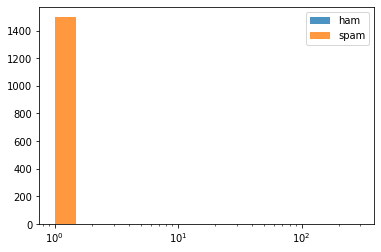

In [ ]:
from sklearn.exceptions import DataConversionWarning
data.tail()
data.shape
data.isnull().sum()
data['label'].value_counts()
data['text'].describe()

import matplotlib.pyplot as plt
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(data[data['label']=='ham']['label_num'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['label_num'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()


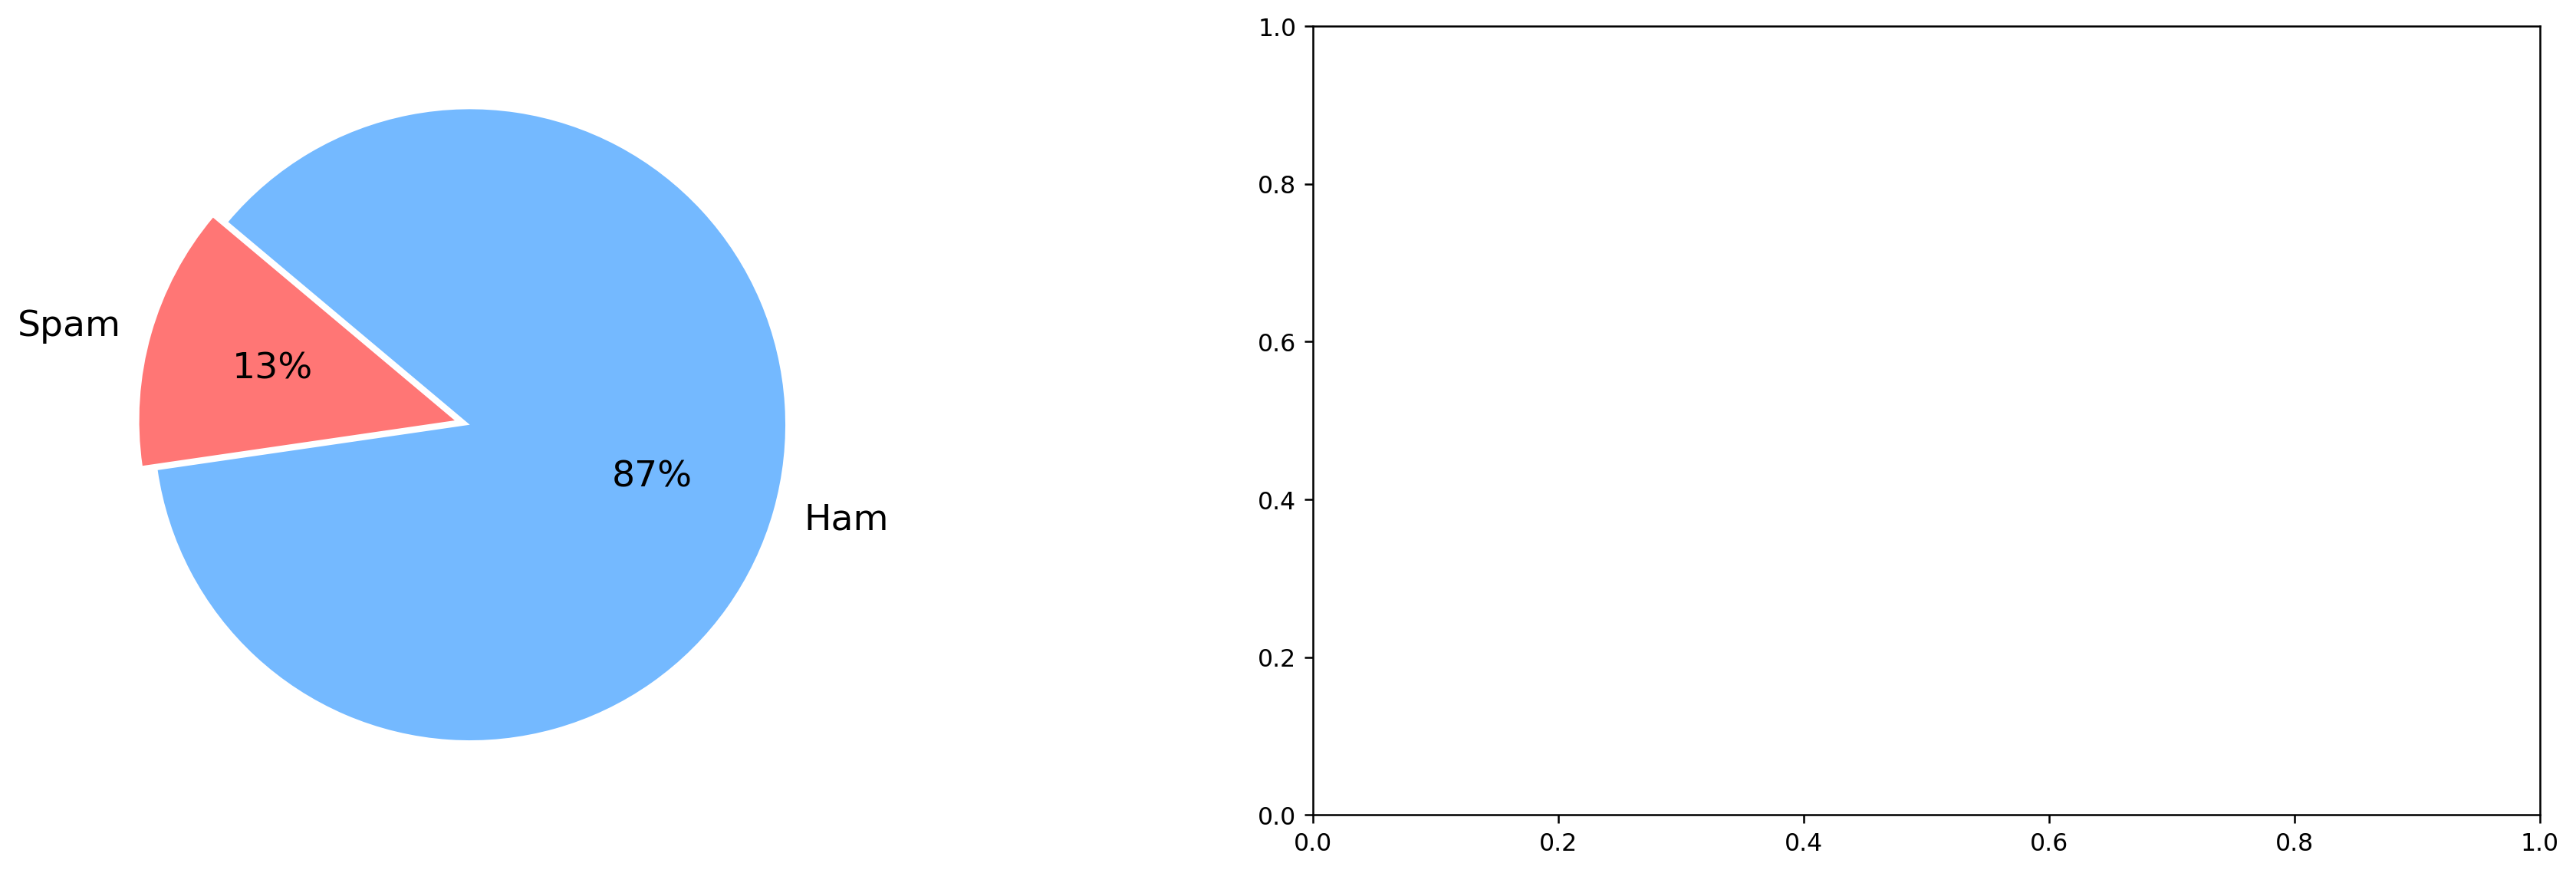

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("spam_ham_dataset.csv")
data.shape
data['label'].value_counts()
labels = ['Spam', 'Ham']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']
plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])
plt.subplot(1, 2, 2)

In [ ]:
#Encoder
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

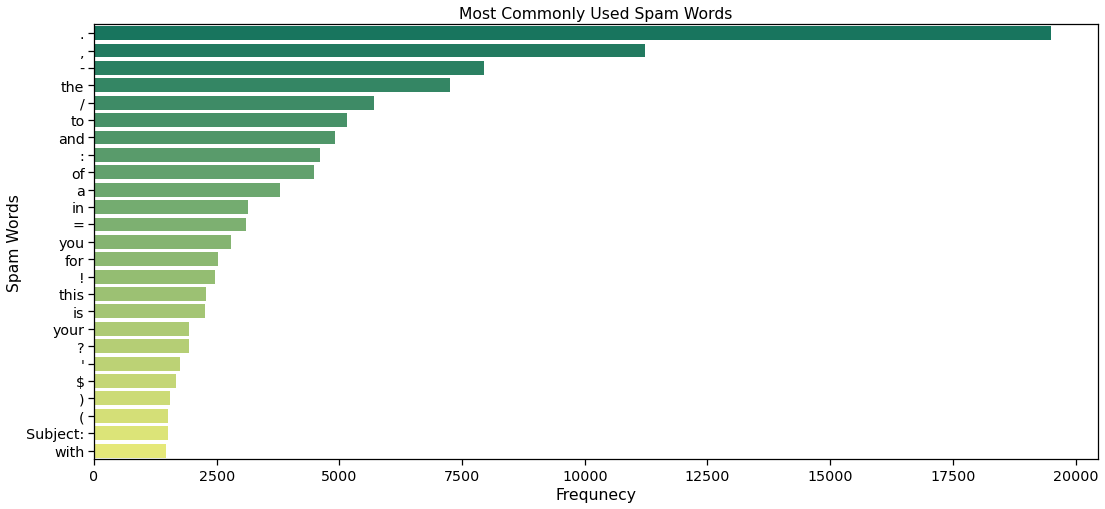

In [ ]:
from collections import Counter
data['label'] = data['label'].replace({'spam':0,'ham':1})
all_spam_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
  for word in sentence.split():
    all_spam_words.append(word)
df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word',
'Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()
all_ham_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
  for word in sentence.split():
    all_ham_words.append(word)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[["text"]])
data[["text"]] = enc.transform(data[["text"]])

In [ ]:
Selected_features = ['text']

X = data[Selected_features]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#NLP preprocessing stuff
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,1209.0,0
1,2349,ham,1985.0,0
2,3624,ham,2774.0,0
3,4685,spam,3158.0,1
4,2030,ham,3613.0,0


In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(y_test, moonsY_pred)

log_regr_score:  0.7192575406032483


array([[930,   0],
       [363,   0]])

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
dec_tree_score1 = clf.score(X_test, y_test)
print('dec_tree_score: ',dec_tree_score1)
confusion_matrix(y_test, moonsY_pred)

dec_tree_score:  0.7927300850734725


array([[830, 100],
       [168, 195]])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
rand_frst_score1 = clf.score(X_test, y_test)
print('random_forest_score: ',rand_frst_score1)
confusion_matrix(y_test, moonsY_pred)

random_forest_score:  0.7432327919566899


array([[919,  11],
       [321,  42]])

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
KNbrs_score1 = clf.score(X_test, y_test)
print('KNbrs_score: ',KNbrs_score1)
confusion_matrix(y_test, moonsY_pred)

KNbrs_score:  0.8267594740912606


array([[824, 106],
       [118, 245]])

In [ ]:
clf = SVC(gamma='auto')
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
SVM_score1 = clf.score(X_test, y_test)
print('SVM_score: ',SVM_score1)
confusion_matrix(y_test, moonsY_pred)

SVM_score:  0.794276875483372


array([[911,  19],
       [247, 116]])

In [ ]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
NB_score1 = clf.score(X_test, y_test)
print('NB_score ',NB_score1)
confusion_matrix(y_test, moonsY_pred)

NB_score  0.7192575406032483


array([[930,   0],
       [363,   0]])

In [ ]:
#Vectorization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("spam_ham_dataset.csv")
x = data.iloc[:, 0].values
y = data.iloc[:, 2].values
regressor = LogisticRegression()


is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [ ]:
X = data['text']

Y = data['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_transformed = feature_extraction.fit_transform(X_train)
X_test_transformed = feature_extraction.transform(X_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_transformed, Y_train)

LogisticRegression()

In [ ]:
prediction_on_training_data = model.predict(X_train_transformed)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  99.70986460348162


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_transformed)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data*100)

Accuracy on test data :  98.06763285024155


**Conclusion : **

>> We learned that the Encoder, NLP preprocessing, and Vectorization worked in stepwise.

>> We learned about various features, parameters, functions, Classifiers, Models, Trees etc.

>> As per above result the Accuracy on training data is 99.71 and Accuracy on test data is 98.07 
